In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

import json
import matplotlib.pyplot as plt
from pywsi.io import WSIReader, read_as_rgb, imshow, read_as_gray, draw_annotation
from pywsi.morphology import TissuePatch

Populating the interactive namespace from numpy and matplotlib


# Visualize a specific region

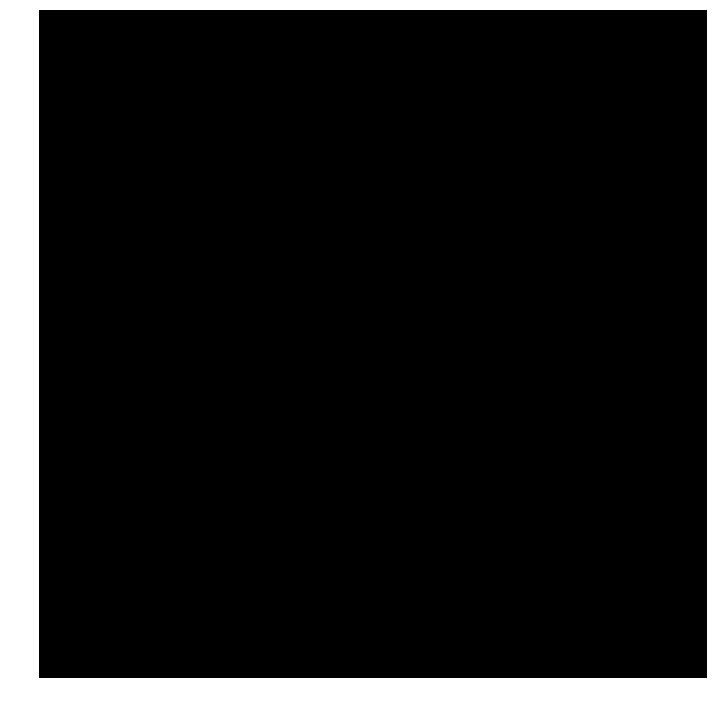

In [7]:
tumor1 = WSIReader('../../../histopath_data/CAMELYON16/training/tumor/tumor_110.tif', 40)
json_filepath = '../../../histopath_data/CAMELYON16/training/lesion_annotations_json/tumor_110.json'

x0 = 51000
y0 = 110000
tumor1.visualize(x0, y0, magnification=1.25, patch_size=1000)


# Visualize the tissue patches (bounding boxes)

In [8]:
tumor1_tissuepatch = TissuePatch(tumor1)


/home/saket/anaconda3/lib/python3.5/site-packages/skimage/color/colorconv.py:275: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
/home/saket/anaconda3/lib/python3.5/site-packages/skimage/color/colorconv.py:279: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]
/home/saket/anaconda3/lib/python3.5/site-packages/skimage/color/colorconv.py:283: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 4. + (arr[idx, 0] - arr[idx, 1]) / delta[idx]


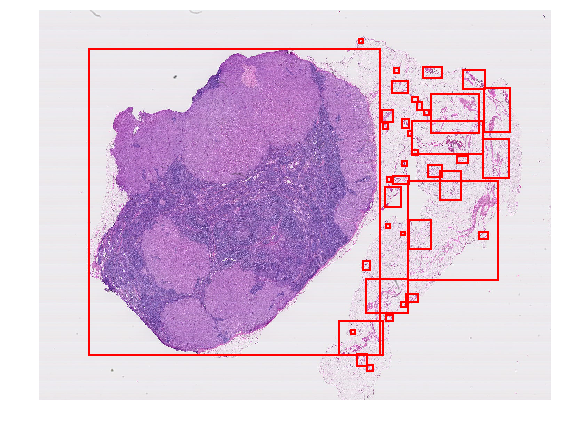

In [9]:
tumor1_tissuepatch.draw_contours()

In [10]:
tumor1_tissuepatch.save_mask('../../../histopath_data/CAMELYON16/training/tissue_masks_level6/')

In [11]:
tumor1.get_annotation_bounding_boxes(json_filepath)

(OrderedDict([('tumor',
               [OrderedDict([('top_left', (12954, 33902)),
                             ('top_right', (52172, 33902)),
                             ('bottom_right', (52172, 7331)),
                             ('bottom_left', (12954, 7331))]),
                OrderedDict([('top_left', (51004, 42551)),
                             ('top_right', (62026, 42551)),
                             ('bottom_right', (62026, 11130)),
                             ('bottom_left', (51004, 11130))]),
                OrderedDict([('top_left', (59696, 31378)),
                             ('top_right', (60189, 31378)),
                             ('bottom_right', (60189, 30840)),
                             ('bottom_left', (59696, 30840))]),
                OrderedDict([('top_left', (60320, 31245)),
                             ('top_right', (60660, 31245)),
                             ('bottom_right', (60660, 31102)),
                             ('bottom_left', (60320, 31102

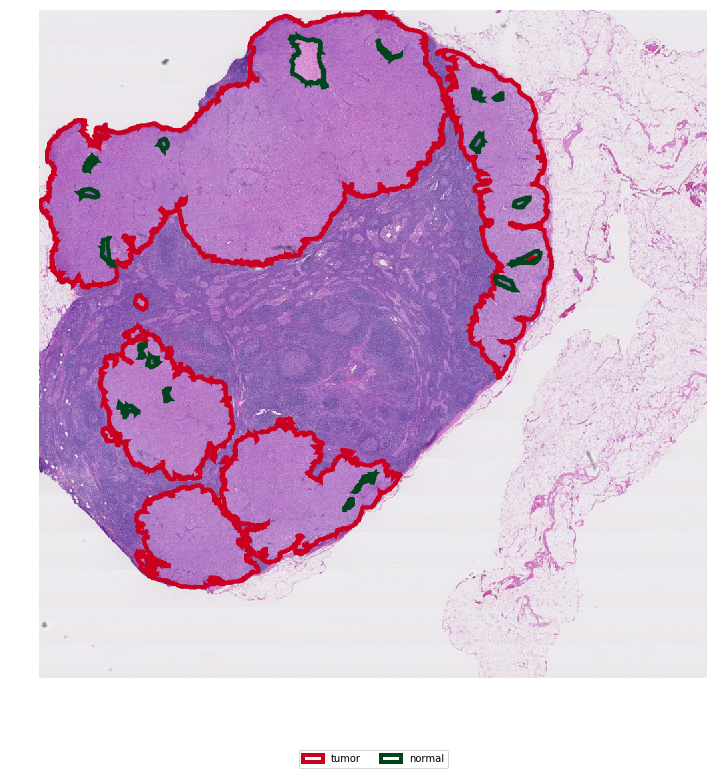

In [13]:
tumor1.autofocus_annotation(json_filepath, level=6, patch_size=1000)

# Visualize the annotated regions (tumor/normal regions in tumor WSIs)

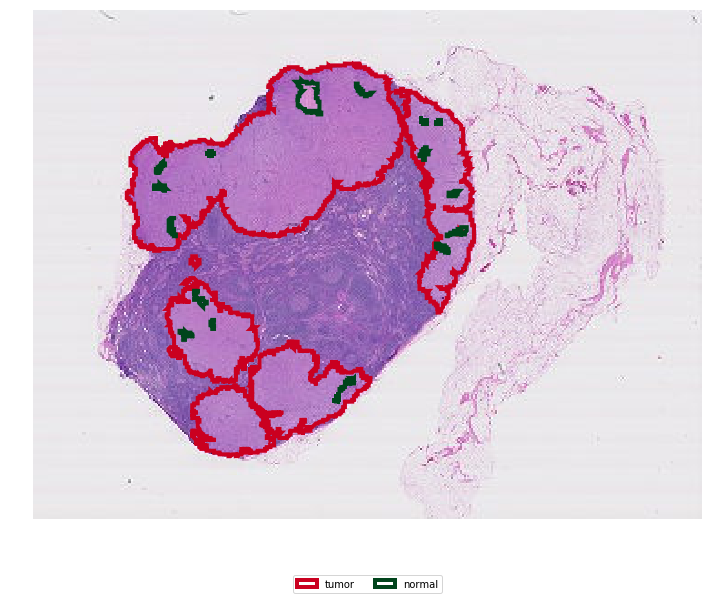

In [14]:
x0=0
y0=0
tumor1.visualize_with_annotation(x0, y0, json_filepath, magnification=tumor1.magnifications[-1])

In [15]:
pols = tumor1.annotation_polygons
for pol in pols:
    print(pol)

Poly((128, 56) ...)
Poly((218, 118) ...)
Poly((234, 121) ...)
Poly((236, 122) ...)
Poly((204, 54) ...)
Poly((204, 50) ...)
Poly((174, 199) ...)
Poly((169, 197) ...)
Poly((165, 194) ...)
Poly((120, 198) ...)
Poly((115, 194) ...)
Poly((102, 208) ...)
Poly((90, 236) ...)
Poly((74, 187) ...)
Poly((79, 187) ...)
Poly((79, 191) ...)
Poly((114, 191) ...)
Poly((119, 191) ...)
Poly((103, 161) ...)
Poly((87, 152) ...)
Poly((87, 137) ...)
Poly((95, 79) ...)
Poly((66, 96) ...)
Poly((69, 85) ...)
Poly((74, 120) ...)
Poly((178, 41) ...)
Poly((227, 123) ...)
Poly((229, 100) ...)
Poly((213, 78) ...)
Poly((213, 58) ...)
Poly((222, 61) ...)
Poly((222, 128) ...)
Poly((167, 211) ...)
Poly((171, 205) ...)
Poly((80, 176) ...)
Poly((97, 171) ...)
Poly((93, 163) ...)
Poly((88, 158) ...)
Poly((147, 43) ...)


In [16]:
pol.get_xy()

array([[147.,  43.],
       [147.,  44.],
       [147.,  44.],
       [148.,  44.],
       [148.,  44.],
       [148.,  44.],
       [148.,  44.],
       [147.,  45.],
       [147.,  45.],
       [147.,  45.],
       [147.,  45.],
       [147.,  45.],
       [146.,  45.],
       [146.,  45.],
       [146.,  45.],
       [146.,  45.],
       [146.,  46.],
       [146.,  46.],
       [146.,  46.],
       [146.,  47.],
       [145.,  47.],
       [145.,  47.],
       [145.,  47.],
       [145.,  47.],
       [145.,  48.],
       [145.,  48.],
       [145.,  48.],
       [145.,  48.],
       [145.,  49.],
       [146.,  49.],
       [145.,  49.],
       [145.,  49.],
       [145.,  50.],
       [145.,  50.],
       [145.,  50.],
       [145.,  50.],
       [145.,  51.],
       [145.,  51.],
       [145.,  51.],
       [145.,  52.],
       [145.,  52.],
       [145.,  52.],
       [145.,  52.],
       [145.,  52.],
       [145.,  52.],
       [145.,  52.],
       [146.,  52.],
       [146.,

# Visualize annotated normal tumor samples at a deeper magnification

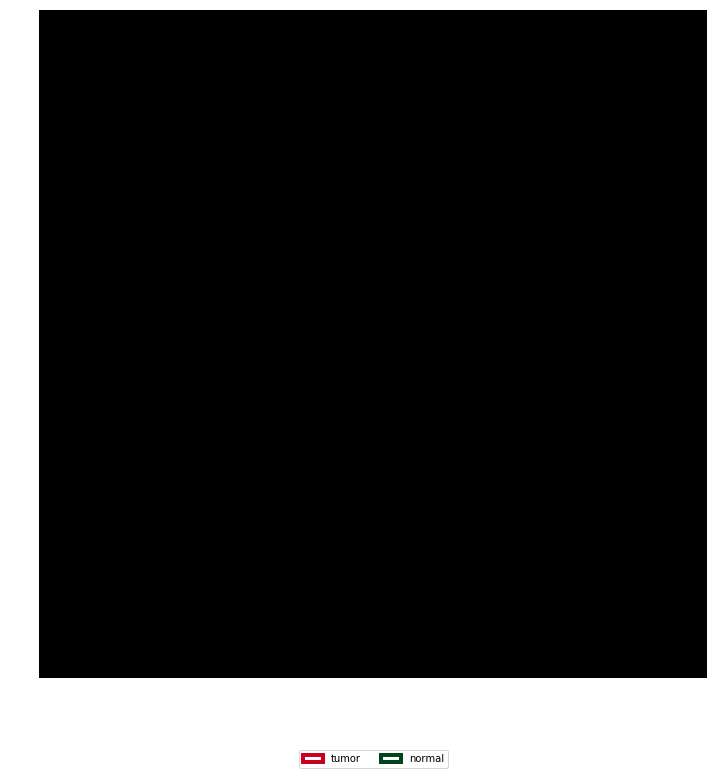

In [17]:
x0 = 51000
y0 = 110000
tumor1.visualize_with_annotation(x0, y0, json_filepath, magnification=1.25, patch_size=1000)


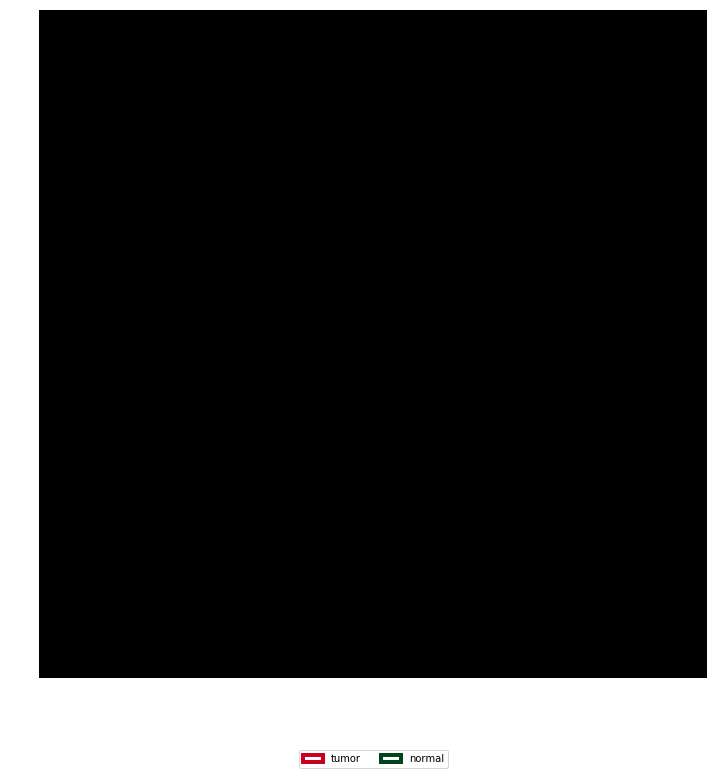

In [18]:
x0 = 60000
y0 = 120000
tumor1.visualize_with_annotation(x0, y0, json_filepath, magnification=2.5, patch_size=1000)


In [19]:
level = 5

patch = tumor1.get_patch_by_level(x0, y0, level=level, patch_size=(256, 256))

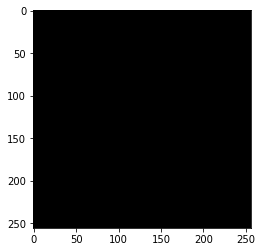

In [20]:
plt.imshow(patch)

In [25]:
grid = tumor1.annotation_masked_slow(json_filepath, level=5)

x len: 6594560
y len: 6594560
shape: (2240, 2944, 3)
grid len: 6594560
points len: 6594560
path len: 4120


KeyboardInterrupt: 

In [ ]:
plt.imshow(grid)

In [62]:
tumor_patch, normal_patch, combined_patch = tumor1.annotation_masked(json_filepath, level=5)

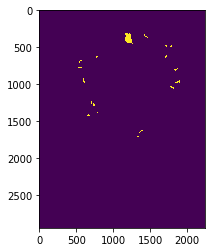

In [64]:
plt.imshow(normal_patch)

In [54]:
grid.shape

(2944, 2240)

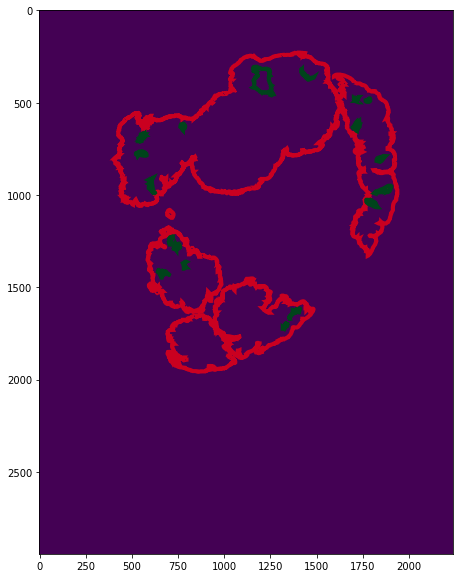

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(grid)
for p in polygons:
    ax.add_patch(p)

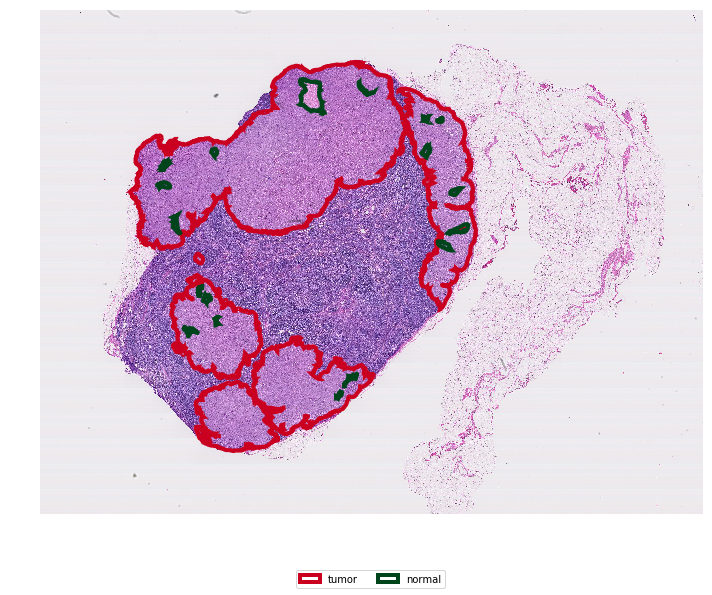

In [49]:
tumor1.visualize_with_annotation(annotation_json=json_filepath, level=5, x0=0, y0=0)